<a href="https://colab.research.google.com/github/ChetanKrishna07/Internet-Firewall-Filtering/blob/main/Internet_Firewall_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Internet Firewall Filtering Using Ensembled Neural Networks
Team:
- Chetan Krishna (20BCE0338)
- Chittala Naveen (20BCE0383)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exporation and Pre-processing

In [2]:
data = pd.read_csv("/content/drive/MyDrive/datasets/internet_firewall_data.csv")
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Source Port,65532.0,49391.969343,1.525571e+04,0.0,49183.0,53776.5,58638.00,6.553400e+04
Destination Port,65532.0,10577.385812,1.846603e+04,0.0,80.0,445.0,15000.00,6.553500e+04
NAT Source Port,65532.0,19282.972761,2.197069e+04,0.0,0.0,8820.5,38366.25,6.553500e+04
NAT Destination Port,65532.0,2671.049930,9.739162e+03,0.0,0.0,53.0,443.00,6.553500e+04
Bytes,65532.0,97123.950085,5.618439e+06,60.0,66.0,168.0,752.25,1.269359e+09
Bytes Sent,65532.0,22385.796908,3.828139e+06,60.0,66.0,90.0,210.00,9.484772e+08
Bytes Received,65532.0,74738.153177,2.463208e+06,0.0,0.0,79.0,449.00,3.208818e+08
Packets,65532.0,102.866035,5.133002e+03,1.0,1.0,2.0,6.00,1.036116e+06
Elapsed Time (sec),65532.0,65.833577,3.024618e+02,0.0,0.0,15.0,30.00,1.082400e+04
pkts_sent,65532.0,41.399530,3.218871e+03,1.0,1.0,1.0,3.00,7.475200e+05


In [5]:
data['Source Port'].value_counts(normalize=True)*100

58638    1.281817
27005    0.782824
443      0.416590
57470    0.338766
49418    0.320454
           ...   
32996    0.001526
60574    0.001526
60570    0.001526
65368    0.001526
54871    0.001526
Name: Source Port, Length: 22724, dtype: float64

In [6]:
data['Destination Port'].value_counts(normalize=True)*100

53       23.521333
445      19.671306
443      17.829457
80        6.157297
25174     1.658732
           ...    
20009     0.001526
48608     0.001526
10016     0.001526
13384     0.001526
22455     0.001526
Name: Destination Port, Length: 3273, dtype: float64

In [7]:
data['NAT Source Port'].value_counts(normalize=True)*100

0        43.386437
48817     0.126656
58638     0.077825
50116     0.022890
7986      0.007630
           ...    
2063      0.001526
33661     0.001526
36797     0.001526
14122     0.001526
13485     0.001526
Name: NAT Source Port, Length: 29152, dtype: float64

In [8]:
data['NAT Destination Port'].value_counts(normalize=True)*100

0        43.386437
53       23.033022
443      17.820302
80        6.146615
27015     0.357077
           ...    
45561     0.001526
45738     0.001526
41872     0.001526
25760     0.001526
32277     0.001526
Name: NAT Destination Port, Length: 2533, dtype: float64

In [9]:
data.isna().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [10]:
data['Packets'].value_counts(normalize=True)*100

1        45.518220
2        25.375389
4         2.826100
6         1.644998
19        1.124641
           ...    
45399     0.001526
12752     0.001526
11272     0.001526
31568     0.001526
4675      0.001526
Name: Packets, Length: 1116, dtype: float64

In [11]:
data['pkts_sent'].value_counts(normalize=True)*100

1       69.054813
2        4.439053
3        2.206556
11       1.939510
6        1.828115
          ...    
939      0.001526
354      0.001526
1118     0.001526
3853     0.001526
985      0.001526
Name: pkts_sent, Length: 749, dtype: float64

In [12]:
data['pkts_received'].value_counts(normalize=True)*100

0       48.181041
1       24.644449
2        2.887139
8        1.939510
3        1.838796
          ...    
798      0.001526
705      0.001526
604      0.001526
315      0.001526
3690     0.001526
Name: pkts_received, Length: 922, dtype: float64

<Axes: xlabel='Action'>

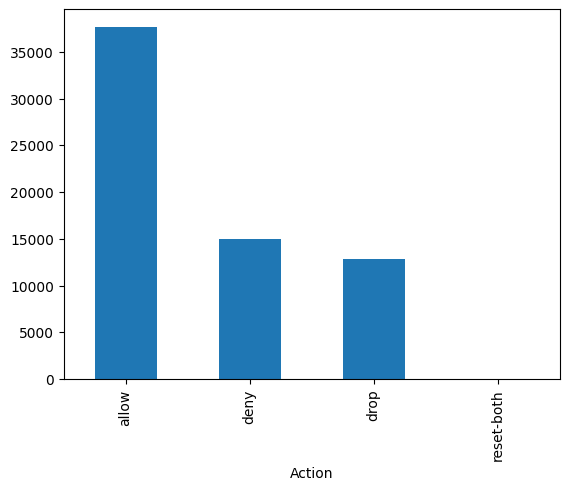

In [13]:
data.groupby('Action')['Source Port'].count().plot(kind='bar')

In [14]:
data.Action.value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [15]:
data = data[data.Action != "reset-both"]

In [17]:
data['Source Port'] = data['Source Port'].astype("str")
data['Destination Port'] = data['Destination Port'].astype("str")
data['NAT Source Port'] = data['NAT Source Port'].astype("str")
data['NAT Destination Port'] = data['NAT Destination Port'].astype("str")

<ipython-input-17-ff8d1e406933>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Source Port'] = data['Source Port'].astype("str")
<ipython-input-17-ff8d1e406933>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Destination Port'] = data['Destination Port'].astype("str")


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65478 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65478 non-null  object
 1   Destination Port      65478 non-null  object
 2   NAT Source Port       65478 non-null  object
 3   NAT Destination Port  65478 non-null  object
 4   Action                65478 non-null  object
 5   Bytes                 65478 non-null  int64 
 6   Bytes Sent            65478 non-null  int64 
 7   Bytes Received        65478 non-null  int64 
 8   Packets               65478 non-null  int64 
 9   Elapsed Time (sec)    65478 non-null  int64 
 10  pkts_sent             65478 non-null  int64 
 11  pkts_received         65478 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 6.5+ MB


In [19]:
pd.DataFrame(data['Source Port'].value_counts(normalize=True)*100).head(10)

,Source Port
58638,1.282874
27005,0.783469
443,0.416934
57470,0.339045
49418,0.320718
6881,0.270320
0,0.264211
50584,0.177159
3478,0.160359
26900,0.155778


In [20]:
data['Source Port'][(data['Source Port'] != '58638') & (data['Source Port'] != '27005') & (data['Source Port'] != '443') & (data['Source Port'] != '57470') & (data['Source Port'] != '49418')] = "others"

<ipython-input-20-8af7c71a8631>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Source Port'][(data['Source Port'] != '58638') & (data['Source Port'] != '27005') & (data['Source Port'] != '443') & (data['Source Port'] != '57470') & (data['Source Port'] != '49418')] = "others"


In [21]:
data['Source Port'].value_counts(normalize=True)

others    0.968570
58638     0.012829
27005     0.007835
443       0.004169
57470     0.003390
49418     0.003207
Name: Source Port, dtype: float64

In [22]:
data['Destination Port'].value_counts(normalize=True)*100

53       23.540731
445      19.687529
443      17.844161
80        6.162375
25174     1.660100
           ...    
3363      0.001527
48608     0.001527
20009     0.001527
10016     0.001527
22455     0.001527
Name: Destination Port, Length: 3264, dtype: float64

In [23]:
data['Destination Port'][(data['Destination Port'] != '53') & (data['Destination Port'] != '445') & (data['Destination Port'] != '443')] = "others"

<ipython-input-23-e6ba37aa97d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Destination Port'][(data['Destination Port'] != '53') & (data['Destination Port'] != '445') & (data['Destination Port'] != '443')] = "others"


In [24]:
data['Destination Port'].value_counts(normalize=True)*100

others    38.927579
53        23.540731
445       19.687529
443       17.844161
Name: Destination Port, dtype: float64

In [25]:
data['NAT Source Port'].value_counts(normalize=True)*100

0        43.358074
48817     0.126760
58638     0.077889
50116     0.022908
57596     0.007636
           ...    
2063      0.001527
33661     0.001527
36797     0.001527
14122     0.001527
13485     0.001527
Name: NAT Source Port, Length: 29143, dtype: float64

In [26]:
data['NAT Source Port'][(data['NAT Source Port'] != '0')] = "others"

<ipython-input-26-5b0b8a5476d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NAT Source Port'][(data['NAT Source Port'] != '0')] = "others"


In [27]:
data['NAT Source Port'].value_counts(normalize=True)*100

others    56.641926
0         43.358074
Name: NAT Source Port, dtype: float64

In [28]:
data['NAT Destination Port'].value_counts(normalize=True)*100

0        43.358074
53       23.052017
443      17.834998
80        6.151685
27015     0.357372
           ...    
45561     0.001527
45738     0.001527
41872     0.001527
25760     0.001527
32277     0.001527
Name: NAT Destination Port, Length: 2533, dtype: float64

In [29]:
data['NAT Destination Port'][(data['NAT Destination Port'] != '0') & (data['NAT Destination Port'] != '53') & (data['NAT Destination Port'] != '443')] = "others"

<ipython-input-29-b90cdf1cd79d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NAT Destination Port'][(data['NAT Destination Port'] != '0') & (data['NAT Destination Port'] != '53') & (data['NAT Destination Port'] != '443')] = "others"


In [30]:
data['NAT Destination Port'].value_counts(normalize=True)*100

0         43.358074
53        23.052017
443       17.834998
others    15.754910
Name: NAT Destination Port, dtype: float64

In [31]:
for c in data.columns:
  print(data[c].value_counts(normalize=True)*100)

others    96.856960
58638      1.282874
27005      0.783469
443        0.416934
57470      0.339045
49418      0.320718
Name: Source Port, dtype: float64
others    38.927579
53        23.540731
445       19.687529
443       17.844161
Name: Destination Port, dtype: float64
others    56.641926
0         43.358074
Name: NAT Source Port, dtype: float64
0         43.358074
53        23.052017
443       17.834998
others    15.754910
Name: NAT Destination Port, dtype: float64
allow    57.484957
deny     22.888604
drop     19.626439
Name: Action, dtype: float64
70         16.266532
66         14.438437
62          8.621216
60          2.481750
146         1.632609
             ...    
73712       0.001527
122815      0.001527
1417        0.001527
1497        0.001527
4680740     0.001527
Name: Bytes, Length: 10724, dtype: float64
70       16.822444
66       14.499527
62        8.653288
94        5.962308
102       5.374324
           ...    
10014     0.001527
31093     0.001527
466       0.00

### Encoding Action (Target Value)

In [32]:
def label_encode(action):
  if action == 'deny':
    return 0
  if action == 'allow':
    return 1
  if action == 'drop':
    return 2
data['Label'] = data['Action'].map(label_encode)
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Label
0,others,53,others,53,allow,177,94,83,2,30,1,1,1
1,others,others,others,others,allow,4768,1600,3168,19,17,10,9,1
2,others,others,others,others,allow,238,118,120,2,1199,1,1,1
3,others,others,others,others,allow,3327,1438,1889,15,17,8,7,1
4,others,443,others,443,allow,25358,6778,18580,31,16,13,18,1


In [33]:
data.drop('Action', axis=1, inplace=True)
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Label
0,others,53,others,53,177,94,83,2,30,1,1,1
1,others,others,others,others,4768,1600,3168,19,17,10,9,1
2,others,others,others,others,238,118,120,2,1199,1,1,1
3,others,others,others,others,3327,1438,1889,15,17,8,7,1
4,others,443,others,443,25358,6778,18580,31,16,13,18,1


In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Bytes,65478.0,97203.918874,5.620755e+06,60.0,66.0,168.0,753.0,1.269359e+09
Bytes Sent,65478.0,22404.141635,3.829717e+06,60.0,66.0,90.0,210.0,9.484772e+08
Bytes Received,65478.0,74799.777238,2.464222e+06,0.0,0.0,79.0,449.0,3.208818e+08
Packets,65478.0,102.949494,5.135118e+03,1.0,1.0,2.0,6.0,1.036116e+06
Elapsed Time (sec),65478.0,65.887764,3.025806e+02,0.0,0.0,15.0,30.0,1.082400e+04
pkts_sent,65478.0,41.432481,3.220198e+03,1.0,1.0,1.0,3.0,7.475200e+05
pkts_received,65478.0,61.517013,2.224248e+03,0.0,0.0,1.0,2.0,3.272080e+05
Label,65478.0,0.967378,6.512240e-01,0.0,1.0,1.0,1.0,2.000000e+00


### Visualizations and handling outliers

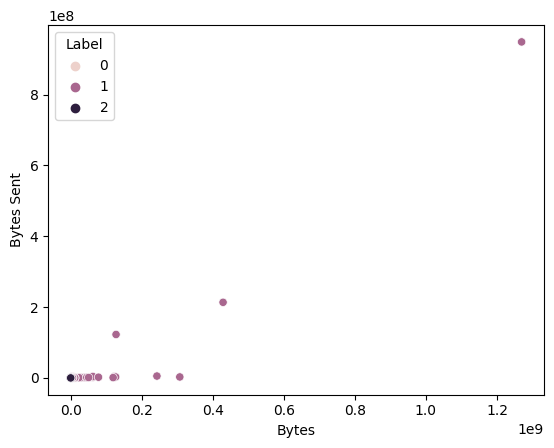

In [35]:
sns.scatterplot(data=data, x="Bytes", y="Bytes Sent", hue="Label")
plt.show()

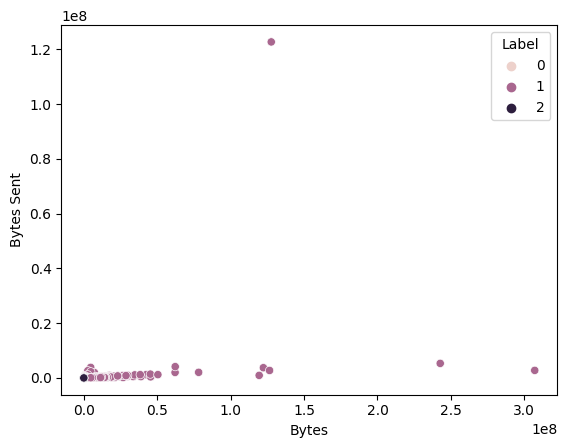

In [36]:
data = data[data.Bytes < 400000000]
sns.scatterplot(data=data, x="Bytes", y="Bytes Sent", hue="Label")
plt.show()

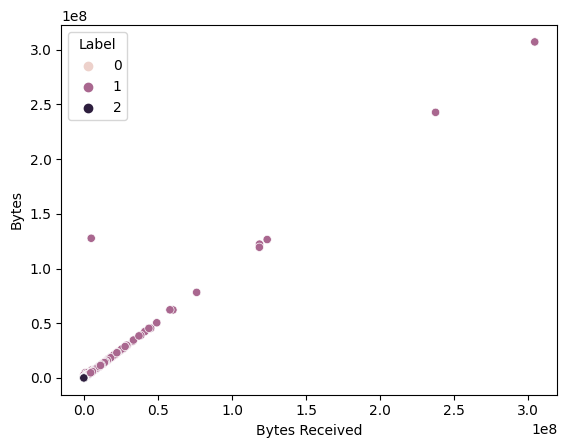

In [37]:
sns.scatterplot(data=data, x="Bytes Received", y="Bytes", hue="Label")
plt.show()

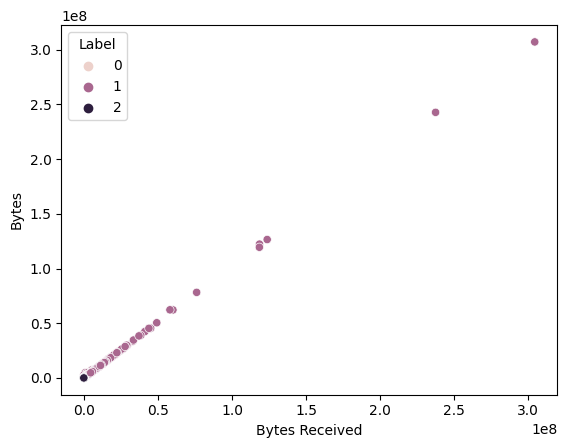

In [38]:
data = data[~ ((data['Bytes Received'] < 0.5e8) & (data['Bytes'] > 1e8))]
sns.scatterplot(data=data, x="Bytes Received", y="Bytes", hue="Label")
plt.show()

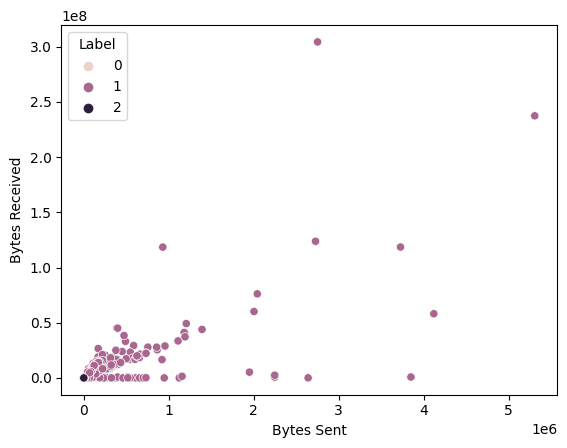

In [39]:
sns.scatterplot(data=data, x="Bytes Sent", y="Bytes Received", hue="Label")
plt.show()

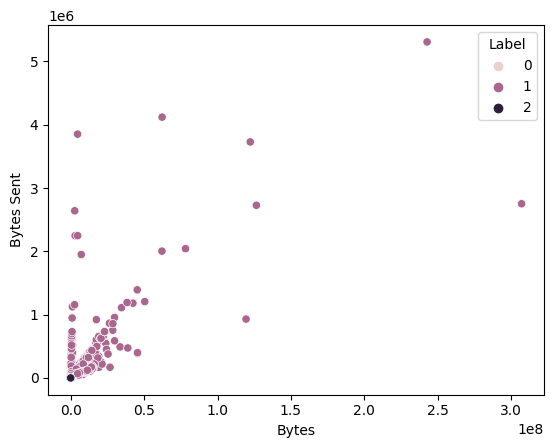

In [40]:
sns.scatterplot(data, x="Bytes", y="Bytes Sent", hue="Label")
plt.show()

In [41]:
data.Label.value_counts(normalize=True)

1    0.574830
0    0.228897
2    0.196273
Name: Label, dtype: float64

### One-hot encoding

In [42]:
data_onehot = pd.get_dummies(data)
data_onehot.head()

,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Label,Source Port_27005,Source Port_443,...,Destination Port_443,Destination Port_445,Destination Port_53,Destination Port_others,NAT Source Port_0,NAT Source Port_others,NAT Destination Port_0,NAT Destination Port_443,NAT Destination Port_53,NAT Destination Port_others
0,177,94,83,2,30,1,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,4768,1600,3168,19,17,10,9,1,0,0,...,0,0,0,1,0,1,0,0,0,1
2,238,118,120,2,1199,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
3,3327,1438,1889,15,17,8,7,1,0,0,...,0,0,0,1,0,1,0,0,0,1
4,25358,6778,18580,31,16,13,18,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [43]:
data_onehot.shape

(65475, 24)

In [44]:
X = data_onehot.drop('Label', axis=1).values
y = data_onehot['Label'].values
X.shape, y.shape

((65475, 23), (65475,))

In [45]:
X, y

(array([[ 177,   94,   83, ...,    0,    1,    0],
        [4768, 1600, 3168, ...,    0,    0,    1],
        [ 238,  118,  120, ...,    0,    0,    1],
        ...,
        [  70,   70,    0, ...,    0,    0,    0],
        [  70,   70,    0, ...,    0,    0,    0],
        [  70,   70,    0, ...,    0,    0,    0]]),
 array([1, 1, 1, ..., 2, 2, 2]))

### Spliting Train and Test set

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((49106, 23), (49106,), (16369, 23), (16369,))

In [47]:
pd.DataFrame(y_train).value_counts(normalize=True)

1    0.574390
0    0.227447
2    0.198163
dtype: float64

### Handling Imabalance in Target Variable
SMOTE Over Sampling Technique

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
pd.DataFrame(y_train_smote).value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
dtype: float64

## Model Building

In [49]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [50]:
X_train[0].shape

(23,)

In [51]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')

### Neural Network

In [52]:
model = Sequential()
model.add(layers.Dense(50, input_shape=(23,), activation='relu'))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=34, epochs=50, callbacks=[early_stopping])

Epoch 1/50
1445/1445 [==============================] - 6s 3ms/step - loss: 49.3108 - accuracy: 0.9349
Epoch 2/50
1445/1445 [==============================] - 4s 3ms/step - loss: 0.4914 - accuracy: 0.9608
Epoch 3/50
1445/1445 [==============================] - 4s 3ms/step - loss: 0.0316 - accuracy: 0.9966
Epoch 4/50
1445/1445 [==============================] - 4s 3ms/step - loss: 0.5031 - accuracy: 0.9769
Epoch 5/50
1445/1445 [==============================] - 4s 3ms/step - loss: 0.0206 - accuracy: 0.9985
Epoch 6/50
1445/1445 [==============================] - 4s 2ms/step - loss: 0.0227 - accuracy: 0.9982
Epoch 7/50
1445/1445 [==============================] - 4s 3ms/step - loss: 0.0135 - accuracy: 0.9984
Epoch 8/50
1445/1445 [==============================] - 4s 3ms/step - loss: 0.3724 - accuracy: 0.9756
Epoch 9/50
1445/1445 [==============================] - 4s 3ms/step - loss: 0.4443 - accuracy: 0.9878
Epoch 10/50
1445/1445 [==============================] - 4s 3ms/step - loss: 0.51

In [53]:
model.evaluate(X_test, y_test)

512/512 [==============================] - 1s 2ms/step - loss: 0.0740 - accuracy: 0.9970


[0.07399451732635498, 0.9970065355300903]

In [54]:
y_pred = np.argmax(model.predict(X_test), axis=1)

512/512 [==============================] - 1s 2ms/step


In [55]:
X_train.shape

(49106, 23)

### Ensembled Neural Network

In [56]:
subsets = []
for _ in range(10):
  index = np.random.randint(0,X_train.shape[0], size=1000)
  X_sub = X_train[index]
  y_sub = y_train[index]
  subsets.append([X_sub, y_sub])

In [57]:
subsets[0][0][0], subsets[0][1][0]

(array([202, 103,  99,   2,  31,   1,   1,   0,   0,   0,   0,   0,   1,
          0,   0,   1,   0,   0,   1,   0,   0,   1,   0]),
 1)

In [58]:
def build_model(i):
  sub_model = Sequential()
  sub_model.add(layers.Dense(50, activation='relu'))
  sub_model.add(layers.Dense(25, activation='relu'))
  sub_model.add(layers.Dense(3, activation='softmax'))

  print(f"Building model {i}")
  sub_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
  sub_model.fit(X_train, y_train, batch_size=34, epochs=8, callbacks=[early_stopping], verbose=False)
  print(f"model {i} built")
  return sub_model

In [59]:
from tqdm import tqdm
models = []
for i in tqdm(range(10)):
  models.append(build_model(i))

  0%|          | 0/10 [00:00<?, ?it/s]

Building model 0


 10%|█         | 1/10 [00:17<02:34, 17.12s/it]

model 0 built
Building model 1


 20%|██        | 2/10 [00:41<02:51, 21.41s/it]

model 1 built
Building model 2


 30%|███       | 3/10 [00:58<02:15, 19.36s/it]

model 2 built
Building model 3


 40%|████      | 4/10 [01:15<01:50, 18.49s/it]

model 3 built
Building model 4


 50%|█████     | 5/10 [01:32<01:29, 17.97s/it]

model 4 built
Building model 5


 60%|██████    | 6/10 [01:52<01:14, 18.74s/it]

model 5 built
Building model 6


 70%|███████   | 7/10 [02:19<01:03, 21.26s/it]

model 6 built
Building model 7


 80%|████████  | 8/10 [02:39<00:41, 20.90s/it]

model 7 built
Building model 8


 90%|█████████ | 9/10 [03:06<00:22, 22.66s/it]

model 8 built
Building model 9


100%|██████████| 10/10 [03:26<00:00, 20.63s/it]

model 9 built


In [60]:
def pred_mass(X_test):
  preds = []
  for m in models:
    pred = pred = np.argmax(m.predict(X_test, verbose=0), axis=1)
    preds.append(pred)
  preds = np.array(preds).T
  finals = []
  for pred in preds:
    finals.append(np.bincount(pred).argmax())
  return np.array(finals)

In [61]:
preds = pred_mass(X_test)

In [62]:
preds.shape

(16369,)

In [63]:
y_test.shape

(16369,)

In [64]:
preds, y_test

(array([1, 2, 1, ..., 2, 1, 0]), array([1, 2, 1, ..., 2, 1, 0]))

In [65]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

acc_e = accuracy_score(y_test, preds)
precision_e, recall_e, f_score_e, support_e = precision_recall_fscore_support(y_test, preds)

In [66]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

acc_n = accuracy_score(y_test, y_pred)
precision_n, recall_n, f_score_n, support_n = precision_recall_fscore_support(y_test, y_pred)

### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

acc_d = accuracy_score(y_test, tree.predict(X_test))
precision_d, recall_d, f_score_d, support_d = precision_recall_fscore_support(y_test, tree.predict(X_test))

### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_r = accuracy_score(y_test, rf.predict(X_test))
precision_r, recall_r, f_score_r, support_r = precision_recall_fscore_support(y_test, tree.predict(X_test))

## Evaluation Metrics for all 4 models

In [69]:
stats = pd.DataFrame({"models": ["Neural Network", "Ensembles-NN", "Decision Tree", "Random Forest"], 
                      "accuracy": [acc_n, acc_e, acc_d, acc_r], 
                      "precision 0": [precision_n[0], precision_e[0], precision_d[0], precision_r[0]], 
                      "precision 1": [precision_n[1], precision_e[1], precision_d[1], precision_r[1]], 
                      "precision 2": [precision_n[2], precision_e[2], precision_d[2], precision_r[2]], 
                      "recall 0": [recall_n[0], recall_e[0], recall_d[0], recall_r[0]], 
                      "recall 1": [recall_n[1], recall_e[1], recall_d[1], recall_r[1]], 
                      "recall 2": [recall_n[2], recall_e[2], recall_d[2], recall_r[2]], 
                      "f_score 0": [f_score_n[0], f_score_e[0], f_score_d[0], f_score_r[0]], 
                      "f_score 1": [f_score_n[1], f_score_e[1], f_score_d[1], f_score_r[1]], 
                      "f_score 2": [f_score_n[2], f_score_e[2], f_score_d[2], f_score_r[2]], 
                      "support 0": [support_n[0], support_e[0], support_d[0], support_r[0]], 
                      "support 1": [support_n[1], support_e[1], support_d[1], support_r[1]], 
                      "support 2": [support_n[2], support_e[2], support_d[2], support_r[2]]
                      })
stats

,models,accuracy,precision 0,precision 1,precision 2,recall 0,recall 1,recall 2,f_score 0,f_score 1,f_score 2,support 0,support 1,support 2
0,Neural Network,0.997007,0.996576,0.997880,0.994898,0.991095,0.998410,1.0,0.993828,0.998145,0.997442,3818,9431,3120
1,Ensembles-NN,0.998351,0.995815,0.999894,0.996805,0.997119,0.998303,1.0,0.996466,0.999098,0.998400,3818,9431,3120
2,Decision Tree,0.999145,0.999213,0.999894,0.996805,0.997119,0.999682,1.0,0.998165,0.999788,0.998400,3818,9431,3120
3,Random Forest,0.999145,0.999213,0.999894,0.996805,0.997119,0.999682,1.0,0.998165,0.999788,0.998400,3818,9431,3120


GitHub Link: https://github.com/ChetanKrishna07/Internet-Firewall-Filtering